# Multiclass Classification and Neural Networks.
usefull links : [http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html] 


In [15]:
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [16]:

print("[X] downloading data...")
mnist = datasets.fetch_mldata("MNIST Original")

[X] downloading data...


In [17]:
print('mnist data shape : ', mnist.data.shape)
print('mnist target shape : ', mnist.target.shape)
print('target', mnist.target)
w,d = np.unique(mnist.target, return_inverse=True)
print('d', d)
np.bincount(d)


mnist data shape :  (70000, 784)
mnist target shape :  (70000,)
target [ 0.  0.  0. ...,  9.  9.  9.]
d [0 0 0 ..., 9 9 9]


array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958], dtype=int64)

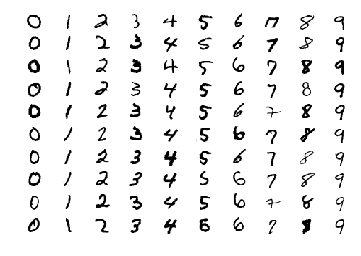

In [18]:
n_digits = 10
n_display_digits = 10
for col in range(n_digits):
    for row in range(n_display_digits):
        plt.subplot(n_display_digits,n_digits,(col)+ n_digits*row+1)
        img = mnist.data[3000+col*6000+row].reshape(28,28)
        plt.axis('off')
        plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

## Let's try to do this multiclass classification manually


In [35]:
from sklearn.cross_validation import train_test_split

#Temporarily reduce the training set to speed up execution while testing...
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size = 0.99)
print('X_train size :', X_train.shape)

print(y_train)

X_train size : (700, 784)
[ 2.  3.  4.  1.  8.  7.  2.  1.  2.  2.  7.  6.  8.  5.  1.  2.  3.  0.
  3.  9.  8.  1.  7.  2.  6.  8.  1.  0.  3.  5.  3.  2.  5.  5.  1.  1.
  7.  6.  5.  1.  6.  3.  6.  4.  6.  4.  4.  3.  0.  0.  7.  5.  9.  6.
  2.  2.  7.  0.  4.  6.  3.  5.  0.  9.  0.  2.  3.  1.  2.  0.  8.  2.
  5.  0.  7.  1.  7.  1.  6.  0.  6.  0.  2.  6.  7.  7.  7.  1.  3.  7.
  1.  2.  0.  2.  1.  1.  2.  5.  1.  0.  5.  5.  1.  3.  4.  9.  1.  4.
  6.  6.  7.  2.  4.  4.  0.  2.  9.  4.  4.  6.  9.  8.  7.  7.  9.  2.
  6.  5.  1.  7.  9.  7.  1.  7.  2.  1.  5.  1.  9.  1.  2.  0.  5.  0.
  5.  8.  8.  5.  3.  2.  0.  7.  0.  6.  9.  0.  5.  1.  0.  5.  9.  1.
  1.  1.  2.  4.  0.  0.  7.  4.  2.  8.  6.  3.  9.  9.  1.  7.  2.  1.
  5.  4.  6.  2.  7.  2.  1.  6.  1.  2.  2.  9.  6.  1.  6.  1.  5.  3.
  3.  2.  8.  8.  5.  8.  8.  4.  3.  4.  7.  0.  4.  8.  5.  1.  1.  8.
  0.  0.  0.  3.  4.  6.  8.  9.  4.  6.  3.  1.  5.  9.  5.  5.  2.  5.
  5.  6.  4.  9.  6.  6. 

The code of these functions should be in a py file to avoid duplication...

In [36]:
from scipy.special import expit

# Split Cost and Gradient : easier to use on personnal descent algo, and required for optimize.fmin function
# finally split Cost and Gradient : easier to use on personnal descent algo, and required for optimize.fmin function
def computeCostBFGS(theta, X, y):
    # y MUST be a column vector.
    y.shape = (y.size,1)

    # Number of samples (training examples)
    m = y.shape[0]
    
    theta.shape = (theta.size, 1)

    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    #print('H:', H)
    
    #print('H:', H)
    J = np.sum(-y*(np.log(H)) - (1-y)*np.log(1-H)) / m
    
    theta.shape = (1,theta.size)
    theta = np.ndarray.flatten(theta[0])
    
    #print('J:', J)

    return J


def computeGradientBFGS(theta, X, y):
    # y MUST be a column vector.
    y.shape = (y.size,1)

    # Number of samples (training examples)
    m = y.shape[0]

    theta.shape = (theta.size, 1)

    # logistic regression with sigmoid
    H = expit(np.dot(X,theta))
    
    grad = np.dot( ((H-y) / m).transpose(), X) / m
    grad.shape = (grad.size, 1)
    theta.shape = (theta.size)
    theta = np.ndarray.flatten(theta)
    grad = np.ndarray.flatten(grad)
    
    return grad


X shape (700, 785)
y :  [ 2.  3.  4.  1.  8.  7.  2.  1.  2.  2.  7.  6.  8.  5.  1.  2.  3.  0.
  3.  9.  8.  1.  7.  2.  6.  8.  1.  0.  3.  5.  3.  2.  5.  5.  1.  1.
  7.  6.  5.  1.  6.  3.  6.  4.  6.  4.  4.  3.  0.  0.  7.  5.  9.  6.
  2.  2.  7.  0.  4.  6.  3.  5.  0.  9.  0.  2.  3.  1.  2.  0.  8.  2.
  5.  0.  7.  1.  7.  1.  6.  0.  6.  0.  2.  6.  7.  7.  7.  1.  3.  7.
  1.  2.  0.  2.  1.  1.  2.  5.  1.  0.  5.  5.  1.  3.  4.  9.  1.  4.
  6.  6.  7.  2.  4.  4.  0.  2.  9.  4.  4.  6.  9.  8.  7.  7.  9.  2.
  6.  5.  1.  7.  9.  7.  1.  7.  2.  1.  5.  1.  9.  1.  2.  0.  5.  0.
  5.  8.  8.  5.  3.  2.  0.  7.  0.  6.  9.  0.  5.  1.  0.  5.  9.  1.
  1.  1.  2.  4.  0.  0.  7.  4.  2.  8.  6.  3.  9.  9.  1.  7.  2.  1.
  5.  4.  6.  2.  7.  2.  1.  6.  1.  2.  2.  9.  6.  1.  6.  1.  5.  3.
  3.  2.  8.  8.  5.  8.  8.  4.  3.  4.  7.  0.  4.  8.  5.  1.  1.  8.
  0.  0.  0.  3.  4.  6.  8.  9.  4.  6.  3.  1.  5.  9.  5.  5.  2.  5.
  5.  6.  4.  9.  6.  6.  1

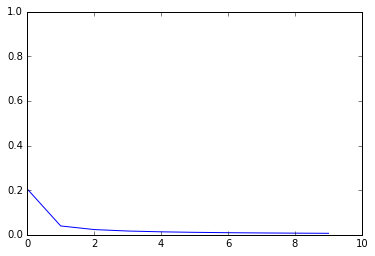

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.0835525770104
Cost evolution [0.36675952556602015, 0.21275940153986186, 0.16292277996678128, 0.13627464078444859, 0.11968508415629048, 0.10824729496234917, 0.09979323838037378, 0.093227157734772886, 0.087936714943851663, 0.083552577010439416]


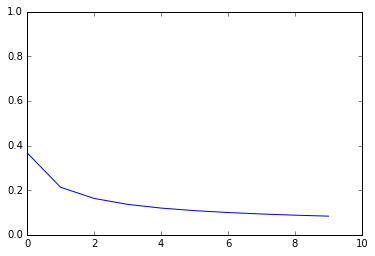

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.141226079266
Cost evolution [0.41419264771737851, 0.29326585824826112, 0.2426337542295782, 0.21177420304980379, 0.19106932516548705, 0.17605362305020078, 0.16452620133330476, 0.15529892303405377, 0.14767684190489958, 0.14122607926556]


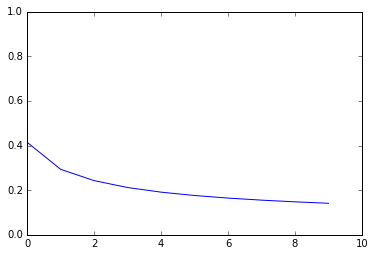

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.124702629712
Cost evolution [0.36824587231199968, 0.25737741209307802, 0.21675659774251191, 0.18976181449759763, 0.17090884018323746, 0.15701532022995249, 0.14629723509813117, 0.13772071365681823, 0.13065650638327653, 0.12470262971209808]


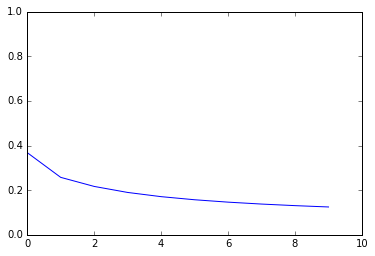

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.121413145793
Cost evolution [0.37783496760520829, 0.25411981893184538, 0.20924325536015378, 0.18205232279883002, 0.16395902668308546, 0.15096527685040115, 0.14108551775900249, 0.13324544749696315, 0.1268179346474162, 0.12141314579266263]


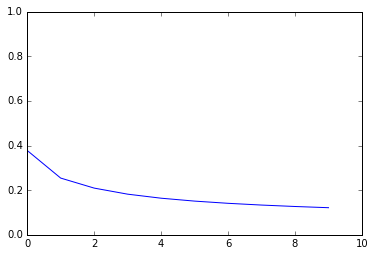

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.163915294566
Cost evolution [0.36595666552872158, 0.27434245152804171, 0.24584480670761708, 0.22495557579202069, 0.209045600283389, 0.19647238104839843, 0.18621582025806308, 0.1776299149546019, 0.17029192568072316, 0.16391529456624149]


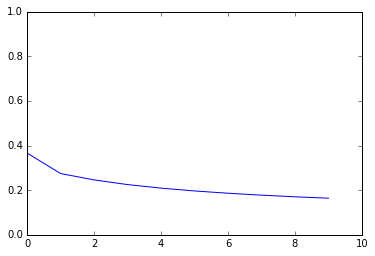

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.101892506544
Cost evolution [0.3707490778812787, 0.24460109840419617, 0.19608887754217533, 0.16615805523922761, 0.1464115354000711, 0.13245153714220437, 0.12201933433024921, 0.11388275279497077, 0.10732244704456645, 0.10189250654358986]


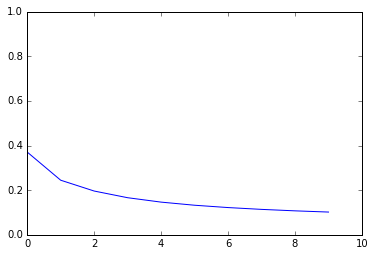

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.112272815838
Cost evolution [0.38396976121311216, 0.25171696360505769, 0.20185298516461528, 0.17281402168968588, 0.15408049979018532, 0.14095269763764945, 0.13117244378520898, 0.12354543852457019, 0.11738585214782137, 0.11227281583791401]


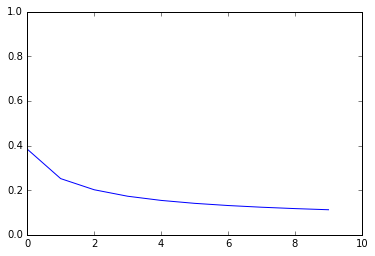

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.209620488307
Cost evolution [0.38539749462577916, 0.30926118366240873, 0.28540026431088061, 0.26689762452092436, 0.25228150384190207, 0.24049436525205595, 0.23078769858347478, 0.22263603878618735, 0.21566861265055512, 0.20962048830663566]


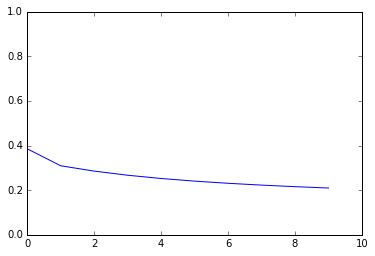

==== Initial Cost : 0.69314718056
= grad shape :  (785,)
Cost : 0.180505417203
Cost evolution [0.37657299916377318, 0.28157559530145088, 0.25229123042832341, 0.23301291043389882, 0.21910738453440287, 0.20835849385068789, 0.19963606591965116, 0.19231404421609305, 0.18601733709008361, 0.18050541720315688]


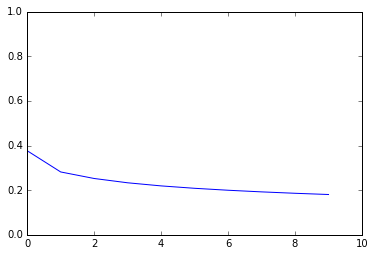

All_Theta:  [  3.51830252e-06   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [37]:
# m : number of training samples
# n : number of features
m, n = X_train.shape

# add this dummy parameter to X
ones = np.ones((m, 1))
X = np.hstack((ones, X_train))
print('X shape', X.shape)

all_theta = np.array([])

print('y : ', y_train.transpose())

# One vs all algorith
for value in range(10):
    y = np.copy(y_train)
    y[y!=value] = 0
    y[y==value] = 1
    # prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
    # we have n+1 parameters because of the "dummy parameter"
    theta = np.zeros(n+1)

    #print('y : ', y)
    #print('Theta: ', theta)
    #cost, grad = computeCostOptim(theta, X, y)
    cost = computeCostBFGS(theta, X, y)
    grad = computeGradientBFGS(theta, X, y)
    print('==== Initial Cost :', cost)
    #print('==== Initial Gradient :', grad)
    print('= grad shape : ', grad.shape)
    alpha = 0.001
    cost_evolution = []
    # Number of samples (training examples)
    m = y.shape[0]

    for i in range(100):
        theta = theta - alpha*grad
        #print('theta :', theta)
        if i%10 == 0:
            #cost, grad = gradientDescent(theta, X, y, m, True)
            cost = computeCostBFGS(theta, X, y)
            grad = computeGradientBFGS(theta, X, y)
            cost_evolution.append(cost)
        else:
            #cost, grad = gradientDescent(theta, X, y, m, False)
            grad = computeGradientBFGS(theta, X, y)

    all_theta = np.hstack((all_theta, theta))
    #print('Theta: ', theta)
    print('Cost :', cost)
    print('Cost evolution', cost_evolution)
    plt.plot(range(len(cost_evolution)), cost_evolution)
    plt.xlim((0,len(cost_evolution)))
    plt.ylim((0, 1))
    plt.show()

print('All_Theta: ', all_theta.transpose())
    


In [38]:
m, n = X_train.shape

print('y train', y_train)

all_theta = np.array([])

# One vs all algorith
for value in range(10):
    y = np.copy(y_train)
    y[y!=value] = 0
    y[y==value] = 1

    # prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
    # we have n+1 parameters because of the "dummy parameter"
    theta = np.zeros(n+1)

    # add this dummy parameter to X
    ones = np.ones((m, 1))
    X = np.hstack((ones, X_train))


    from scipy import optimize

    # prior to computing the cost, we must initialize theta (weights, params...) to a zero matrix (could be also a random matrix)
    # we have n+1 parameters because of the "dummy parameter"
    init_theta = np.zeros((n+1))
    theta = optimize.fmin_ncg(computeCostBFGS, x0=init_theta, args=(X,y), fprime=computeGradientBFGS)
    #print('SOLUTION : ', theta)
    all_theta = np.hstack((all_theta, theta))
    
print('SOLUTION : ', all_theta)


y train [ 2.  3.  4.  1.  8.  7.  2.  1.  2.  2.  7.  6.  8.  5.  1.  2.  3.  0.
  3.  9.  8.  1.  7.  2.  6.  8.  1.  0.  3.  5.  3.  2.  5.  5.  1.  1.
  7.  6.  5.  1.  6.  3.  6.  4.  6.  4.  4.  3.  0.  0.  7.  5.  9.  6.
  2.  2.  7.  0.  4.  6.  3.  5.  0.  9.  0.  2.  3.  1.  2.  0.  8.  2.
  5.  0.  7.  1.  7.  1.  6.  0.  6.  0.  2.  6.  7.  7.  7.  1.  3.  7.
  1.  2.  0.  2.  1.  1.  2.  5.  1.  0.  5.  5.  1.  3.  4.  9.  1.  4.
  6.  6.  7.  2.  4.  4.  0.  2.  9.  4.  4.  6.  9.  8.  7.  7.  9.  2.
  6.  5.  1.  7.  9.  7.  1.  7.  2.  1.  5.  1.  9.  1.  2.  0.  5.  0.
  5.  8.  8.  5.  3.  2.  0.  7.  0.  6.  9.  0.  5.  1.  0.  5.  9.  1.
  1.  1.  2.  4.  0.  0.  7.  4.  2.  8.  6.  3.  9.  9.  1.  7.  2.  1.
  5.  4.  6.  2.  7.  2.  1.  6.  1.  2.  2.  9.  6.  1.  6.  1.  5.  3.
  3.  2.  8.  8.  5.  8.  8.  4.  3.  4.  7.  0.  4.  8.  5.  1.  1.  8.
  0.  0.  0.  3.  4.  6.  8.  9.  4.  6.  3.  1.  5.  9.  5.  5.  2.  5.
  5.  6.  4.  9.  6.  6.  1.  3.  1.  4.  7

C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide 

Optimization terminated successfully.
         Current function value: 0.000003
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 292
         Hessian evaluations: 0


C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide 

Optimization terminated successfully.
         Current function value: nan
         Iterations: 17
         Function evaluations: 198
         Gradient evaluations: 374
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.009249
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 48
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 202
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.086393
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 32
         Hessian evaluations: 0
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 166
         Hessian 

C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\nmauger\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in multiply
